In [5]:
print("Verifying spark content exist")
sc

Verifying spark content exist


<SparkContext master=spark://jkg-deployment-a571cd5f-e899-4be9-92a8-7f571a3fe6a2-7cbbc4d5lq6:7077 appName=pyspark-shell>

In [6]:
import tensorflow as tf

In [12]:
#!pip install --upgrade watson-developer-cloud

In [22]:
url_1 = 'https://raw.githubusercontent.com/IBMDataScience/Watson-Studio-Examples/master/Search-and-rescue/sar-model/test_images/ball.jpg'
url_2 = 'https://raw.githubusercontent.com/IBMDataScience/Watson-Studio-Examples/master/Search-and-rescue/sar-model/test_images/blocks.jpg'
url_3 = 'https://raw.githubusercontent.com/IBMDataScience/Watson-Studio-Examples/master/Search-and-rescue/sar-model/test_images/horse.jpg'
url_4 = 'https://raw.githubusercontent.com/IBMDataScience/Watson-Studio-Examples/master/Search-and-rescue/sar-model/test_images/wheelbarrow.jpg'

In [25]:
model_id = 'objectIdentifier' # <-- PASTE YOUR MODEL ID HERE
apikey   = '-2RYgOiXlwV5jgsEcuWpksIcRSbK84oK4Vwau_G1NVNP' # <-- PASTE YOUR APIKEY HERE

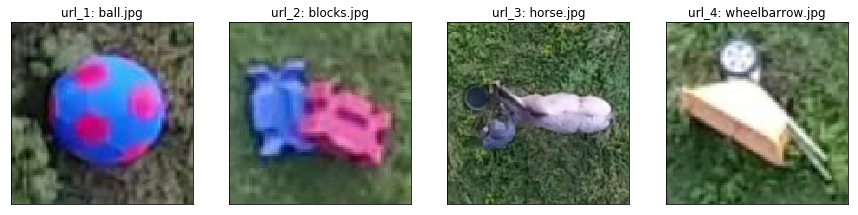

In [17]:
from skimage import io
import matplotlib.pyplot as plt
import re
fig, axs = plt.subplots( 1, 4, figsize=( 15, 60 ) )
axs[0].imshow( io.imread(url_1) )
axs[1].imshow( io.imread(url_2) )
axs[2].imshow( io.imread(url_3) )
axs[3].imshow( io.imread(url_4) )
axs[0].set_title( 'url_1: ' + re.sub( '.*\/', '', url_1 ) )
axs[1].set_title( 'url_2: ' + re.sub( '.*\/', '', url_2 ) )
axs[2].set_title( 'url_3: ' + re.sub( '.*\/', '', url_3 ) )
axs[3].set_title( 'url_4: ' + re.sub( '.*\/', '', url_4 ) )
for img in axs:
    img.set_xticks([])
    img.set_yticks([])

In [26]:
from watson_developer_cloud import VisualRecognitionV3
visual_recognition = VisualRecognitionV3( version='2018-03-19', iam_apikey=apikey )

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: VisualRecognitionV3 is a deprecated function. watson-developer-cloud moved to ibm-watson
  from ipykernel import kernelapp as app


In [35]:
#import json
#results = visual_recognition.classify( url=url_4, threshold='0', classifier_ids=model_id ).get_result()
#!pip install wget
#!pip install --upgrade opencv-python

    100% |################################| 25.4MB 688kB/s eta 0:00:01
    100% |################################| 17.2MB 912kB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
pyspark 2.3.0 requires py4j==0.10.6, which is not installed.


In [38]:
import wget
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
import re
from watson_developer_cloud import VisualRecognitionV3
import json


In [39]:
!rm -f *.jpg
!rm -f *.png

filename_1 = 'video1_frame.jpg'
filename_2 = 'video2_frame.jpg'

url_base = 'https://github.com/IBMDataScience/Watson-Studio-Examples/raw/master/Search-and-rescue/sar-web-app/code/static/'

url_1 = url_base + filename_1
url_2 = url_base + filename_2

wget.download( url_1 )
wget.download( url_2 )

!ls -l

total 4260
drwxr-xr-x 2 spark spark    4096 Apr  4 03:47 logs
drwxr-xr-x 2 spark spark    4096 Apr  4 03:47 spark-events
drwxr-xr-x 6 spark spark    4096 Apr  4 03:47 user-libs
-rw-r--r-- 1 spark spark 2001844 Apr  4 04:12 video1_frame.jpg
-rw-r--r-- 1 spark spark 2326276 Apr  4 04:12 video2_frame.jpg


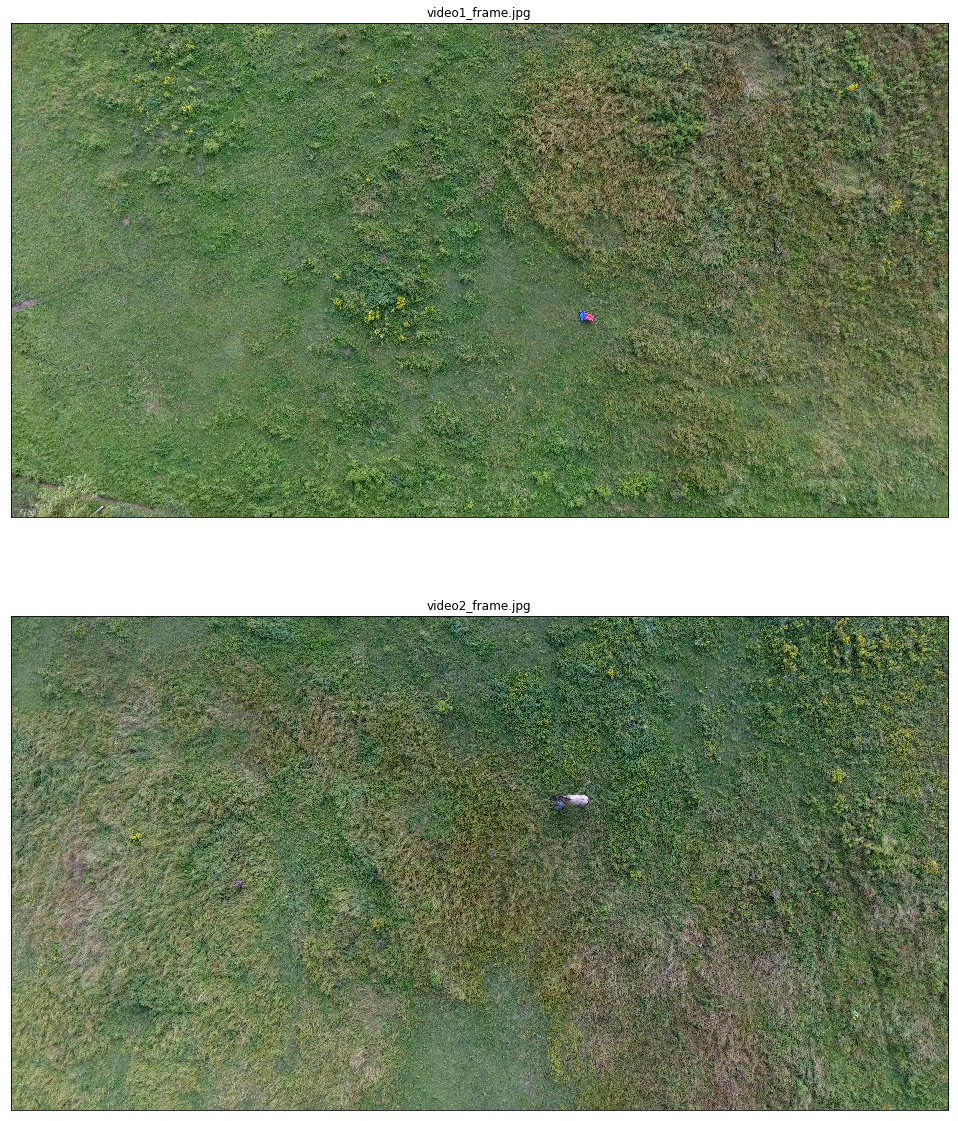

In [40]:
fig, axs = plt.subplots( 2, 1, figsize=( 18, 20 ) )
axs[0].imshow( mpimg.imread( filename_1 ) )
axs[0].set_title( filename_1 )
axs[1].imshow( mpimg.imread( filename_2 ) )
axs[1].set_title( filename_2 )
for i in range(2):
    axs[i].set_xticks([])
    axs[i].set_yticks([])

In [41]:
def applyColourThreshold( frame ):
    lower_green = ( 0, 0, 0 )
    upper_green = ( 90, 255, 255 )
    frame_hsv    = cv2.cvtColor( frame, cv2.COLOR_BGR2HSV )
    frame_mask   = cv2.bitwise_not( cv2.inRange( frame_hsv, lower_green, upper_green ) )
    return frame_mask

def findContours( frame_mask ):
    contours_arr, heirarchy = cv2.findContours( frame_mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )
    return contours_arr

def showProgression( frame, frame_mask, contours_arr ):
    frame_w_contours = cv2.drawContours( frame.copy(), contours_arr, -1, ( 25, 255, 255 ), 2 )
    fig, axs = plt.subplots( 1, 3, figsize=( 25, 10 ) )
    axs[0].imshow( cv2.cvtColor( frame[500:1500,2000:3000], cv2.COLOR_BGR2RGB ), cmap='gray' )
    axs[0].set_title( 'Original frame' )
    axs[1].imshow( frame_mask[500:1500,2000:3000], cmap='gray')
    axs[1].set_title( 'Colour (green) threshold applied' )
    axs[2].imshow( cv2.cvtColor( frame_w_contours[500:1500,2000:3000], cv2.COLOR_BGR2RGB ), cmap='gray' )
    axs[2].set_title( 'Countours drawn onto original frame (in yellow)' )
    for img in axs:
        img.set_xticks([])
        img.set_yticks([])
        
def detectObjs( frame ):
    frame_mask   = applyColourThreshold( frame )
    contours_arr = findContours( frame_mask )
    showProgression( frame, frame_mask, contours_arr )
    return contours_arr

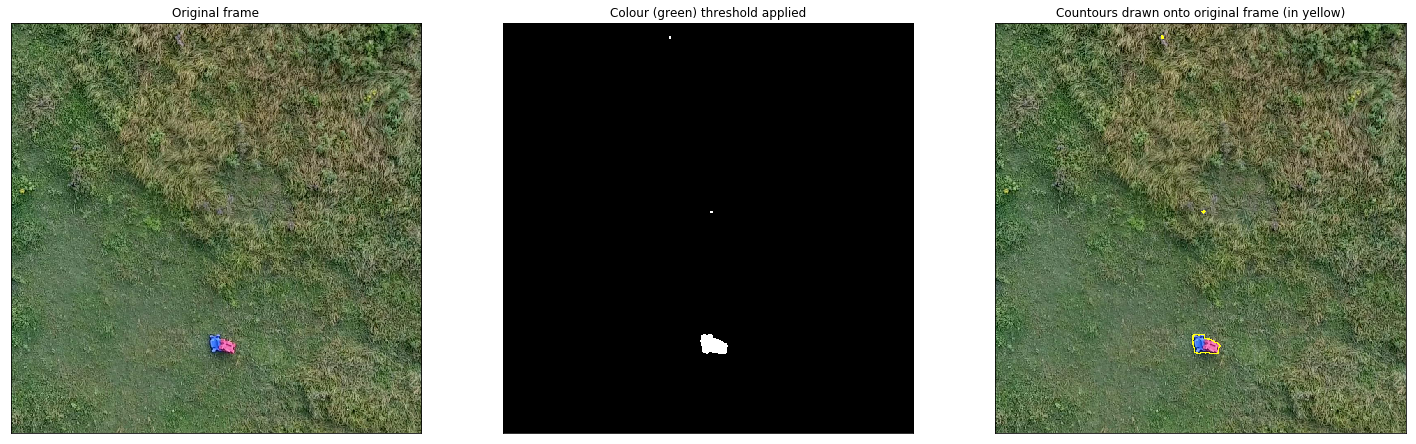

In [42]:
frame = cv2.imread( filename_1 )
contours_arr = detectObjs( frame )